In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim
import seaborn as sns
pd.options.display.max_columns=None
pd.reset_option("display.max_rows")

In [7]:
df = pd.read_csv('./data/occurrence.txt', sep='\t')
df.head()

/home/davidgp/anaconda3/envs/pfm/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (198,237) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,conformsTo,contributor,coverage,created,creator,date,dateAccepted,dateCopyrighted,dateSubmitted,description,educationLevel,extent,format,hasFormat,hasPart,hasVersion,identifier,instructionalMethod,isFormatOf,isPartOf,isReferencedBy,isReplacedBy,isRequiredBy,isVersionOf,issued,language,license,mediator,medium,modified,provenance,publisher,references,relation,replaces,requires,rights,rightsHolder,source,spatial,subject,tableOfContents,temporal,title,type,valid,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,occurrenceStatus,preparations,disposition,associatedReferences,associatedSequences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,organismID,organismName,organismScope,associatedOccurrences,associatedOrganisms,previousIdentifications,organismRemarks,materialSampleID,eventID,parentEventID,fieldNumber,eventDate,eventTime,startDayOfYear,endDayOfYear,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,sampleSizeValue,sampleSizeUnit,fieldNotes,eventRemarks,locationID,higherGeographyID,higherGeography,continent,waterBody,islandGroup,island,countryCode,stateProvince,county,municipality,locality,verbatimLocality,verbatimElevation,verbatimDepth,minimumDistanceAboveSurfaceInMeters,maximumDistanceAboveSurfaceInMeters,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,pointRadiusSpatialFit,verbatimCoordinateSystem,verbatimSRS,footprintWKT,footprintSRS,footprintSpatialFit,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,geologicalContextID,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,earliestEraOrLowestErathem,latestEraOrHighestErathem,earliestPeriodOrLowestSystem,latestPeriodOrHighestSystem,earliestEpochOrLowestSeries,latestEpochOrHighestSeries,earliestAgeOrLowestStage,latestAgeOrHighestStage,lowestBiostratigraphicZone,highestBiostratigraphicZone,lithostratigraphicTerms,group,formation,member,bed,identificationID,identificationQualifier,typeStatus,identifiedBy,dateIdentified,identificationReferences,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,nameAccordingToID,namePublishedInID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,nameAccordingTo,namePublishedIn,namePublishedInYear,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,vernacularName,nomenclaturalCode,taxonomicStatus,nomenclaturalStatus,taxonRemarks,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,distanceAboveSurface,distanceAboveSurfaceAccuracy,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
0,2993408646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diveboard:462150_216586_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,2020-12-10T12:05:05Z,NaN,NaN,https://www.diveboard.com/dejan/D46FCLr,NaN,NaN,NaN,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,NaN,NaN,NaN,NaN,NaN,NaN,Event,NaN,NaN,NaN,https://

In [8]:
df_spain = df[df['countryCode'] == 'ES']
df_spain.head()

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,conformsTo,contributor,coverage,created,creator,date,dateAccepted,dateCopyrighted,dateSubmitted,description,educationLevel,extent,format,hasFormat,hasPart,hasVersion,identifier,instructionalMethod,isFormatOf,isPartOf,isReferencedBy,isReplacedBy,isRequiredBy,isVersionOf,issued,language,license,mediator,medium,modified,provenance,publisher,references,relation,replaces,requires,rights,rightsHolder,source,spatial,subject,tableOfContents,temporal,title,type,valid,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,occurrenceStatus,preparations,disposition,associatedReferences,associatedSequences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,organismID,organismName,organismScope,associatedOccurrences,associatedOrganisms,previousIdentifications,organismRemarks,materialSampleID,eventID,parentEventID,fieldNumber,eventDate,eventTime,startDayOfYear,endDayOfYear,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,sampleSizeValue,sampleSizeUnit,fieldNotes,eventRemarks,locationID,higherGeographyID,higherGeography,continent,waterBody,islandGroup,island,countryCode,stateProvince,county,municipality,locality,verbatimLocality,verbatimElevation,verbatimDepth,minimumDistanceAboveSurfaceInMeters,maximumDistanceAboveSurfaceInMeters,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,pointRadiusSpatialFit,verbatimCoordinateSystem,verbatimSRS,footprintWKT,footprintSRS,footprintSpatialFit,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,geologicalContextID,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,earliestEraOrLowestErathem,latestEraOrHighestErathem,earliestPeriodOrLowestSystem,latestPeriodOrHighestSystem,earliestEpochOrLowestSeries,latestEpochOrHighestSeries,earliestAgeOrLowestStage,latestAgeOrHighestStage,lowestBiostratigraphicZone,highestBiostratigraphicZone,lithostratigraphicTerms,group,formation,member,bed,identificationID,identificationQualifier,typeStatus,identifiedBy,dateIdentified,identificationReferences,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,nameAccordingToID,namePublishedInID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,nameAccordingTo,namePublishedIn,namePublishedInYear,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,vernacularName,nomenclaturalCode,taxonomicStatus,nomenclaturalStatus,taxonRemarks,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,distanceAboveSurface,distanceAboveSurfaceAccuracy,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
511,2813227463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diveboard:455428_215394_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,2020-06-22T17:01:17Z,NaN,NaN,https://www.diveboard.com/thierry4/D6bo3fW,NaN,NaN,NaN,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,NaN,NaN,NaN,NaN,NaN,NaN,Event,NaN,NaN,NaN,htt

In [18]:
np.sort(pd.unique(df_spain['waterBody']))

array(['28.170426', 'Alboran Sea', 'Atlantic', 'Atlantic Ocean',
       'Atlantic Ocen', 'Balearic Sea', 'Baltic Sea', 'Bay of Biscay',
       'Bay of Palma', 'Cantabric Sea', 'Fuerteventura', 'Ile de Medes',
       'La Herradura', 'Lanzarote', 'Mar Cantabrico', 'Mar Mediterráneo',
       'Mar Menuda', 'Mar de Alborán', 'Mediterranean Sea',
       'Mediterraneo', 'Mer Méditerranée', 'Oceano atlantico',
       'Océan Atlantique', 'Ria Arousa', 'River', 'Sea', 'Tenerife',
       'Tossa de Mar'], dtype=object)

In [19]:
df_spain[df_spain['waterBody'] == '28.170426']

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,conformsTo,contributor,coverage,created,creator,date,dateAccepted,dateCopyrighted,dateSubmitted,description,educationLevel,extent,format,hasFormat,hasPart,hasVersion,identifier,instructionalMethod,isFormatOf,isPartOf,isReferencedBy,isReplacedBy,isRequiredBy,isVersionOf,issued,language,license,mediator,medium,modified,provenance,publisher,references,relation,replaces,requires,rights,rightsHolder,source,spatial,subject,tableOfContents,temporal,title,type,valid,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,occurrenceStatus,preparations,disposition,associatedReferences,associatedSequences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,organismID,organismName,organismScope,associatedOccurrences,associatedOrganisms,previousIdentifications,organismRemarks,materialSampleID,eventID,parentEventID,fieldNumber,eventDate,eventTime,startDayOfYear,endDayOfYear,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,sampleSizeValue,sampleSizeUnit,fieldNotes,eventRemarks,locationID,higherGeographyID,higherGeography,continent,waterBody,islandGroup,island,countryCode,stateProvince,county,municipality,locality,verbatimLocality,verbatimElevation,verbatimDepth,minimumDistanceAboveSurfaceInMeters,maximumDistanceAboveSurfaceInMeters,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,pointRadiusSpatialFit,verbatimCoordinateSystem,verbatimSRS,footprintWKT,footprintSRS,footprintSpatialFit,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,geologicalContextID,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,earliestEraOrLowestErathem,latestEraOrHighestErathem,earliestPeriodOrLowestSystem,latestPeriodOrHighestSystem,earliestEpochOrLowestSeries,latestEpochOrHighestSeries,earliestAgeOrLowestStage,latestAgeOrHighestStage,lowestBiostratigraphicZone,highestBiostratigraphicZone,lithostratigraphicTerms,group,formation,member,bed,identificationID,identificationQualifier,typeStatus,identifiedBy,dateIdentified,identificationReferences,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,nameAccordingToID,namePublishedInID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,nameAccordingTo,namePublishedIn,namePublishedInYear,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,vernacularName,nomenclaturalCode,taxonomicStatus,nomenclaturalStatus,taxonRemarks,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,distanceAboveSurface,distanceAboveSurfaceAccuracy,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
3511,1585878774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diveboard:369888_317752_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,2017-08-20T17:14:53Z,NaN,NaN,https://www.diveboard.com/vidakris/D325BMd,NaN,NaN,NaN,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,NaN,NaN,NaN,NaN,NaN,NaN,Event,NaN,NaN,NaN,ht

In [26]:
df['depth'].max(), df['depth'].min()

(250.0, 0.0)

In [23]:
df[df['depth'] == df['depth'].max()]

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,conformsTo,contributor,coverage,created,creator,date,dateAccepted,dateCopyrighted,dateSubmitted,description,educationLevel,extent,format,hasFormat,hasPart,hasVersion,identifier,instructionalMethod,isFormatOf,isPartOf,isReferencedBy,isReplacedBy,isRequiredBy,isVersionOf,issued,language,license,mediator,medium,modified,provenance,publisher,references,relation,replaces,requires,rights,rightsHolder,source,spatial,subject,tableOfContents,temporal,title,type,valid,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,occurrenceStatus,preparations,disposition,associatedReferences,associatedSequences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,organismID,organismName,organismScope,associatedOccurrences,associatedOrganisms,previousIdentifications,organismRemarks,materialSampleID,eventID,parentEventID,fieldNumber,eventDate,eventTime,startDayOfYear,endDayOfYear,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,sampleSizeValue,sampleSizeUnit,fieldNotes,eventRemarks,locationID,higherGeographyID,higherGeography,continent,waterBody,islandGroup,island,countryCode,stateProvince,county,municipality,locality,verbatimLocality,verbatimElevation,verbatimDepth,minimumDistanceAboveSurfaceInMeters,maximumDistanceAboveSurfaceInMeters,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,pointRadiusSpatialFit,verbatimCoordinateSystem,verbatimSRS,footprintWKT,footprintSRS,footprintSpatialFit,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,geologicalContextID,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,earliestEraOrLowestErathem,latestEraOrHighestErathem,earliestPeriodOrLowestSystem,latestPeriodOrHighestSystem,earliestEpochOrLowestSeries,latestEpochOrHighestSeries,earliestAgeOrLowestStage,latestAgeOrHighestStage,lowestBiostratigraphicZone,highestBiostratigraphicZone,lithostratigraphicTerms,group,formation,member,bed,identificationID,identificationQualifier,typeStatus,identifiedBy,dateIdentified,identificationReferences,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,nameAccordingToID,namePublishedInID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,nameAccordingTo,namePublishedIn,namePublishedInYear,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,vernacularName,nomenclaturalCode,taxonomicStatus,nomenclaturalStatus,taxonRemarks,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,distanceAboveSurface,distanceAboveSurfaceAccuracy,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
35009,857003378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diveboard:20597_208729_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,2015-04-29T12:26:02Z,NaN,NaN,https://www.diveboard.com/reyna.duluvs/D3NgVHQ,NaN,NaN,NaN,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,NaN,NaN,NaN,NaN,NaN,NaN,Event,NaN,NaN,NaN

In [45]:
np.sort(df['depth'].unique())[::-1][:10]

array([250.   , 106.   ,  97.5  ,  65.665,  55.   ,  50.5  ,  50.   ,
        49.5  ,  49.   ,  48.615])

In [48]:
df[df['depth'] > 40]

,gbifID,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,bibliographicCitation,conformsTo,contributor,coverage,created,creator,date,dateAccepted,dateCopyrighted,dateSubmitted,description,educationLevel,extent,format,hasFormat,hasPart,hasVersion,identifier,instructionalMethod,isFormatOf,isPartOf,isReferencedBy,isReplacedBy,isRequiredBy,isVersionOf,issued,language,license,mediator,medium,modified,provenance,publisher,references,relation,replaces,requires,rights,rightsHolder,source,spatial,subject,tableOfContents,temporal,title,type,valid,institutionID,collectionID,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,informationWithheld,dataGeneralizations,dynamicProperties,occurrenceID,catalogNumber,recordNumber,recordedBy,individualCount,organismQuantity,organismQuantityType,sex,lifeStage,reproductiveCondition,behavior,establishmentMeans,occurrenceStatus,preparations,disposition,associatedReferences,associatedSequences,associatedTaxa,otherCatalogNumbers,occurrenceRemarks,organismID,organismName,organismScope,associatedOccurrences,associatedOrganisms,previousIdentifications,organismRemarks,materialSampleID,eventID,parentEventID,fieldNumber,eventDate,eventTime,startDayOfYear,endDayOfYear,year,month,day,verbatimEventDate,habitat,samplingProtocol,samplingEffort,sampleSizeValue,sampleSizeUnit,fieldNotes,eventRemarks,locationID,higherGeographyID,higherGeography,continent,waterBody,islandGroup,island,countryCode,stateProvince,county,municipality,locality,verbatimLocality,verbatimElevation,verbatimDepth,minimumDistanceAboveSurfaceInMeters,maximumDistanceAboveSurfaceInMeters,locationAccordingTo,locationRemarks,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,coordinatePrecision,pointRadiusSpatialFit,verbatimCoordinateSystem,verbatimSRS,footprintWKT,footprintSRS,footprintSpatialFit,georeferencedBy,georeferencedDate,georeferenceProtocol,georeferenceSources,georeferenceVerificationStatus,georeferenceRemarks,geologicalContextID,earliestEonOrLowestEonothem,latestEonOrHighestEonothem,earliestEraOrLowestErathem,latestEraOrHighestErathem,earliestPeriodOrLowestSystem,latestPeriodOrHighestSystem,earliestEpochOrLowestSeries,latestEpochOrHighestSeries,earliestAgeOrLowestStage,latestAgeOrHighestStage,lowestBiostratigraphicZone,highestBiostratigraphicZone,lithostratigraphicTerms,group,formation,member,bed,identificationID,identificationQualifier,typeStatus,identifiedBy,dateIdentified,identificationReferences,identificationVerificationStatus,identificationRemarks,taxonID,scientificNameID,acceptedNameUsageID,parentNameUsageID,originalNameUsageID,nameAccordingToID,namePublishedInID,taxonConceptID,scientificName,acceptedNameUsage,parentNameUsage,originalNameUsage,nameAccordingTo,namePublishedIn,namePublishedInYear,higherClassification,kingdom,phylum,class,order,family,genus,subgenus,specificEpithet,infraspecificEpithet,taxonRank,verbatimTaxonRank,vernacularName,nomenclaturalCode,taxonomicStatus,nomenclaturalStatus,taxonRemarks,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,distanceAboveSurface,distanceAboveSurfaceAccuracy,issue,mediaType,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,subgenusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,typifiedName,protocol,lastParsed,lastCrawled,repatriated,relativeOrganismQuantity,recordedByID,identifiedByID,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
14983,1058265600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,diveboard:201519_216663_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC_BY_NC_4_0,NaN,NaN,2015-04-23T00:18:15Z,NaN,NaN,https://www.diveboard.com/kurtyj/D3RC7pN,NaN,NaN,NaN,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,NaN,NaN,NaN,NaN,NaN,NaN,Event,NaN,NaN,NaN,htt

In [53]:
list(df.columns)

['gbifID',
 'abstract',
 'accessRights',
 'accrualMethod',
 'accrualPeriodicity',
 'accrualPolicy',
 'alternative',
 'audience',
 'available',
 'bibliographicCitation',
 'conformsTo',
 'contributor',
 'coverage',
 'created',
 'creator',
 'date',
 'dateAccepted',
 'dateCopyrighted',
 'dateSubmitted',
 'description',
 'educationLevel',
 'extent',
 'format',
 'hasFormat',
 'hasPart',
 'hasVersion',
 'identifier',
 'instructionalMethod',
 'isFormatOf',
 'isPartOf',
 'isReferencedBy',
 'isReplacedBy',
 'isRequiredBy',
 'isVersionOf',
 'issued',
 'language',
 'license',
 'mediator',
 'medium',
 'modified',
 'provenance',
 'publisher',
 'references',
 'relation',
 'replaces',
 'requires',
 'rights',
 'rightsHolder',
 'source',
 'spatial',
 'subject',
 'tableOfContents',
 'temporal',
 'title',
 'type',
 'valid',
 'institutionID',
 'collectionID',
 'datasetID',
 'institutionCode',
 'collectionCode',
 'datasetName',
 'ownerInstitutionCode',
 'basisOfRecord',
 'informationWithheld',
 'dataGeneral

In [88]:
list(df.columns[df.isna().all().sort_index() == False])

['accrualMethod',
 'accrualPeriodicity',
 'dateCopyrighted',
 'extent',
 'format',
 'hasFormat',
 'hasPart',
 'isReferencedBy',
 'isReplacedBy',
 'mediator',
 'medium',
 'modified',
 'relation',
 'requires',
 'rights',
 'rightsHolder',
 'source',
 'spatial',
 'datasetName',
 'ownerInstitutionCode',
 'dataGeneralizations',
 'recordedBy',
 'individualCount',
 'occurrenceStatus',
 'preparations',
 'disposition',
 'associatedReferences',
 'occurrenceRemarks',
 'previousIdentifications',
 'materialSampleID',
 'habitat',
 'samplingEffort',
 'fieldNotes',
 'eventRemarks',
 'municipality',
 'verbatimLocality',
 'verbatimElevation',
 'minimumDistanceAboveSurfaceInMeters',
 'maximumDistanceAboveSurfaceInMeters',
 'locationAccordingTo',
 'pointRadiusSpatialFit',
 'verbatimCoordinateSystem',
 'verbatimSRS',
 'footprintWKT',
 'footprintSRS',
 'footprintSpatialFit',
 'georeferencedBy',
 'georeferencedDate',
 'georeferenceProtocol',
 'georeferenceRemarks',
 'lowestBiostratigraphicZone',
 'highestBios

In [133]:
df2 = df.copy()

In [134]:
df2.dropna(axis=1, how='all', inplace=True)

In [135]:
df2.columns.shape

(82,)

In [136]:
list(df2.columns.sort_values())

['acceptedScientificName',
 'acceptedTaxonKey',
 'basisOfRecord',
 'catalogNumber',
 'class',
 'classKey',
 'collectionCode',
 'coordinateUncertaintyInMeters',
 'countryCode',
 'datasetID',
 'datasetKey',
 'datasetName',
 'dateIdentified',
 'day',
 'decimalLatitude',
 'decimalLongitude',
 'depth',
 'depthAccuracy',
 'elevation',
 'elevationAccuracy',
 'eventDate',
 'family',
 'familyKey',
 'gbifID',
 'genericName',
 'genus',
 'genusKey',
 'georeferenceSources',
 'hasCoordinate',
 'hasGeospatialIssues',
 'identifiedBy',
 'identifier',
 'infraspecificEpithet',
 'institutionCode',
 'issue',
 'kingdom',
 'kingdomKey',
 'lastCrawled',
 'lastInterpreted',
 'lastParsed',
 'level0Gid',
 'level0Name',
 'level1Gid',
 'level1Name',
 'level2Gid',
 'level2Name',
 'level3Gid',
 'level3Name',
 'license',
 'locality',
 'modified',
 'month',
 'nameAccordingTo',
 'occurrenceID',
 'occurrenceRemarks',
 'occurrenceStatus',
 'order',
 'orderKey',
 'ownerInstitutionCode',
 'phylum',
 'phylumKey',
 'protocol

In [138]:
df2['kingdom'].unique()

array(['Animalia', 'Chromista', 'incertae sedis', 'Plantae'], dtype=object)

In [139]:
df2[df2['kingdom'] == 'Animalia'].shape

(38235, 82)

In [140]:
df2 = df2[df2['kingdom'] == 'Animalia']

In [149]:
df2.groupby(by='waterBody').agg('count').sort_values(by='gbifID', ascending=False)

,gbifID,identifier,license,modified,references,rights,rightsHolder,type,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,recordedBy,occurrenceStatus,occurrenceRemarks,eventDate,year,month,day,samplingProtocol,countryCode,locality,verbatimLocality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,georeferenceSources,identifiedBy,dateIdentified,taxonID,scientificName,nameAccordingTo,kingdom,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,taxonomicStatus,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,protocol,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
waterBody,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Caribbean Sea,4566,4566,4566,4566,4167,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4528,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4555,4549,4478,4411,0,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4566,4555,4549,4478,4411,4411,4566,4566,4566,4566,4566,4566,4566,1260,1260,1200,1200,348,348,4,4
Red Sea,2174,2174,2174,2174,1938,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2161,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2170,2174,2170,2153,2129,1,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2174,2170,2174,2170,2153,2129,2129,2174,2174,2174,2174,2174,2174,2174,395,395,395,395,321,321,1,1
Atlantic Ocean,2139,2139,2139,2139,1951,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2093,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2135,2109,2076,1985,8,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2139,2135,2109,2076,1985,1985,2139,2139,2139,2139,2139,2139,2139,620,620,616,616,514,514,337,337
Andaman Sea,1936,1936,1936,1936,1823,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1931,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1934,1932,1921,1913,1894,2,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1936,1934,1932,1921,1913,1894,1894,1936,1936,1936,1936,1936,1936,1936,334,334,334,334,334,334,334,334
Mediterranean Sea,1917,1917,1917,1917,1624,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1884,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1916,1913,1910,1891,1846,11,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1917,1916,1913,1910,1891,1846,1846,1917,1917,1917,1917,1917,1917,1917,806,806,800,800,694,694,515,515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Le Grand Conglue,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Lankayan,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Landfalltjern,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [151]:
df2.groupby(by='verbatimLocality').agg('count').sort_values(by='gbifID', ascending=False)

,gbifID,identifier,license,modified,references,rights,rightsHolder,type,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,recordedBy,occurrenceStatus,occurrenceRemarks,eventDate,year,month,day,samplingProtocol,waterBody,countryCode,locality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,georeferenceSources,identifiedBy,dateIdentified,taxonID,scientificName,nameAccordingTo,kingdom,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,taxonomicStatus,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,protocol,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
verbatimLocality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Strande, Strande, Schleswig-holstein",211,211,211,211,0,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,0,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,0,0,0,0,0,0,0,0
"Shelly Beach, Manly, NSW",192,192,192,192,189,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,191,190,0,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,191,190,190,192,192,192,192,192,192,192,0,0,0,0,0,0,0,0
"White Rock, Koh Tao",180,180,180,180,168,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,178,1,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,178,178,180,180,180,180,180,180,180,0,0,0,0,0,0,0,0
"Sandycove, Dun Laoghaire",133,133,133,133,13,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,0,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,0,0,0,0,0,0,0,0
"Paso Del Cedral, Cozumel",133,133,133,133,127,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,129,125,0,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,133,129,125,125,133,133,133,133,133,133,133,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Butterfish Hollow, Narragansett, RI",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
"Buzio Pequeno (Little Island), Angra Dos Reis",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Ras Shona, Marsa Alam",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


In [156]:
df2[df2['countryCode'] == 'ES'].groupby(by='verbatimLocality').agg('count').sort_values(by='gbifID', ascending=False)

,gbifID,identifier,license,modified,references,rights,rightsHolder,type,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,recordedBy,occurrenceStatus,occurrenceRemarks,eventDate,year,month,day,samplingProtocol,waterBody,countryCode,locality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,georeferenceSources,identifiedBy,dateIdentified,taxonID,scientificName,nameAccordingTo,kingdom,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,taxonomicStatus,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,protocol,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
verbatimLocality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Mar Menuda, Tossa De Mar",104,104,104,104,68,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,6,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
"Ullastre Iii, Llafranc",78,78,78,78,21,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,3,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,1,1,1,1,1,1,1,1
"Ullastre I, Palamos Town To Cap De Begur",71,71,71,71,28,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,2,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,0,0,0,0,0,0,0,0
"Charco Del Palo, Lanzarote",51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,47,41,0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,47,41,41,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
"Playa Chica, Puerto del Carmen, Lanzarote",36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,0,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"El Portal, Fuerteventura",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"La Madrague, Roses",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
"Playa Paraiso, Los Cristianos",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


In [155]:
df2[df2['countryCode'] == 'ES'].groupby(by='locality').agg('count').sort_values(by='gbifID', ascending=False)[:15]

,gbifID,identifier,license,modified,references,rights,rightsHolder,type,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,recordedBy,occurrenceStatus,occurrenceRemarks,eventDate,year,month,day,samplingProtocol,waterBody,countryCode,verbatimLocality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,georeferenceSources,identifiedBy,dateIdentified,taxonID,scientificName,nameAccordingTo,kingdom,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,taxonomicStatus,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,protocol,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name
locality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mar Menuda,115,115,115,115,79,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,6,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115
Ullastre Iii,78,78,78,78,21,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,3,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,1,1,1,1,1,1,1,1
Ullastre I,71,71,71,71,28,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,2,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,0,0,0,0,0,0,0,0
Charco Del Palo,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,47,41,0,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,47,41,41,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51
El Toro,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,0,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,0,0,0,0,0,0,0,0
Playa Chica,38,38,38,38,36,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,0,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,14,14,14,14,14,14,14,14
El Montiell,34,34,34,34,7,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,0,0,0,0,0,0,0,0
Cala Llorell,32,32,32,32,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,0,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
Pedra De Deu,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,0,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31


In [158]:
list(np.unique(df2[df2['countryCode'] == 'ES']['verbatimLocality']))

[',',
 ', Calpe',
 ', Garachico, Tenerife',
 ', Sant Andreu de Llavaneres',
 ', Tenerife Sul - Las Galletas',
 ', palm mar',
 'Abades, Tenerife',
 'Alagranza, Puerto de Mogán',
 'Ancoradouro, Bueu',
 'Aries Wreck, \xa0Galicia',
 'Artificial Reef, Puerto Rico, Grand Canaria',
 'As Furnas, \xa0Galicia',
 'Bahia Grande, Font de Sa Cala',
 'Bahialila,',
 'Baixo Lusquinos, O Grove',
 'Baja Camellos, La Restinga, El Hierro',
 'Baja De Luis, Fuerteventura',
 'Bajo De Dentro, La Manga & Cabo Palos',
 'Bajo De Lino, Corralejo, Fuerteventura',
 'Bajo De Mikel, Corralejo, Fuerteventura',
 'Bajo De Piles Ii, La Manga & Cabo Palos',
 'Bajon Del Rio, Corralejo, Fuerteventura',
 'Bajío De Conil,',
 'Balito Deep,',
 'Balky Point, Cabo de Palos, Murcia',
 "Barra De L'illa, Tossa De Mar",
 'Barranco, Caleta de Fuste, Fuerteventura',
 "Barreta De L'arbre, Mataro",
 'Bau Cap Trencat De Fora, Roses',
 'Bello Rincón, Aguadulce, Almería',
 'Benidorm Island, Benidorm',
 'Benidorm Island, Comunidad Valenciana'

In [178]:
df2[df2['countryCode'] == 'ES']['locality'].astype(str).sort_values().unique()

array(['Abades', 'Alagranza', 'Ancoradouro', 'Aries Wreck',
       'Artificial Reef', 'As Furnas', 'Bahia Grande', 'Bahialila',
       'Baixo Lusquinos', 'Baja Camellos', 'Baja De Luis',
       'Bajo De Dentro', 'Bajo De Lino', 'Bajo De Mikel',
       'Bajo De Piles Ii', 'Bajon Del Rio', 'Bajío De Conil',
       'Balito Deep', 'Balky Point', "Barra De L'illa", 'Barranco',
       "Barreta De L'arbre", 'Bau Cap Trencat De Fora', 'Bello Rincón',
       'Benidorm Island', 'Black Beach', 'Blue Hole', 'Bocayna',
       'Bolognesa Banus 3', 'Bravo', 'Cabo Foix',
       'Cabo San Martin Norte La Virgen', 'Cabo San Martín',
       'Cala Blanca', 'Cala Cortina', 'Cala Figuera', 'Cala Llorell',
       'Cala Margarida', 'Cala Montjo', 'Cala Pedrosa', 'Cala Tamariu',
       'Cala Viuda', 'Caleta De Abajo', 'Caleta Del Morro De Vedell',
       'Canaries, Tenerife, Las Rosas', 'Canons De Tamariu',
       'Canyelles Diving', 'Canyones De Fallaguer', 'Cap Negret',
       'Cap Roig', 'Capo De Palos', 'C

In [179]:
df2[df2['locality'] == 'Mar Menuda'][['decimalLatitude','decimalLongitude']]

,decimalLatitude,decimalLongitude
3541,41.7217,2.93964
3577,41.7217,2.93964
3581,41.7217,2.93964
3599,41.7217,2.93964
3606,41.7217,2.93964
...,...,...
26265,41.7217,2.93964
26267,41.7217,2.93964
26268,41.7217,2.93964
34939,41.7217,2.93964


In [181]:
df2[df2['locality'] == 'Ancoradouro'][['decimalLatitude','decimalLongitude']]

,decimalLatitude,decimalLongitude
13296,42.3355,-8.7885
13312,42.3355,-8.7885


In [182]:
df2.groupby('year')['gbifID'].count()

year
1972       2
1973       2
1974       3
1975       5
1976       3
1979       6
1980       6
1981       4
1983       1
1985       7
1986       1
1987       5
1988      19
1989      36
1990      47
1991      13
1992      22
1993      13
1994      18
1995      23
1996      30
1997      70
1998      79
1999     162
2000     231
2001     115
2002     196
2003     230
2004     340
2005     427
2006     296
2007     385
2008     920
2009     747
2010    1247
2011    2642
2012    5893
2013    6301
2014    5671
2015    3724
2016    2977
2017    3216
2018    1265
2019     643
2020     192
Name: gbifID, dtype: int64

In [196]:
df_spain =df2[ df2['countryCode'] == 'ES']

In [295]:
df_spain['depth'].median()

10.515

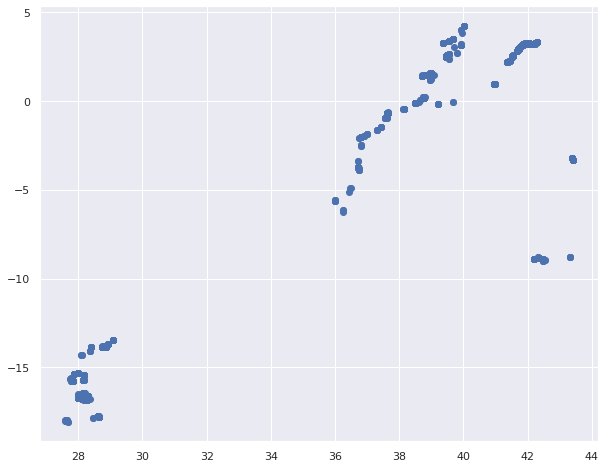

In [223]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df_spain['decimalLatitude'], df_spain['decimalLongitude']);

In [202]:
df_spain['species'].value_counts()

Muraena helena            115
Epinephelus marginatus     66
Sphyraena sphyraena        62
Chromis chromis            60
Palinurus elephas          50
                         ... 
Thalassoma newtoni          1
Dascyllus reticulatus       1
Chlorurus troschelii        1
Aetobatus narinari          1
Chrysaora fuscescens        1
Name: species, Length: 367, dtype: int64

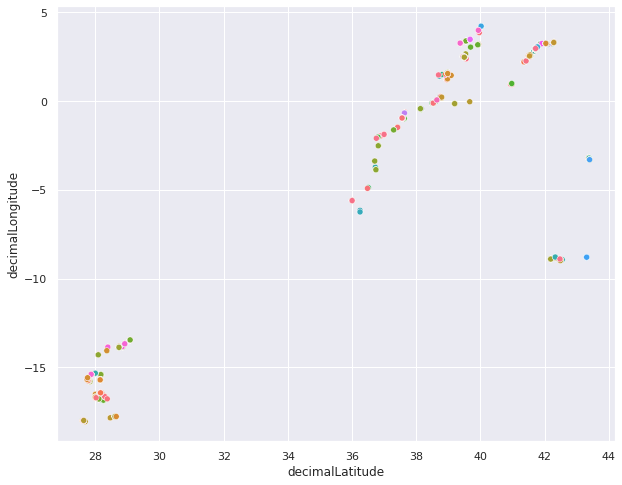

In [219]:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(x=df_spain['decimalLatitude'], y=df_spain['decimalLongitude'],
                hue=df_spain['species'],
                legend=False);

In [286]:
#df_spain.groupby('species')['gbifID'].count().sort_values(ascending=False)[:10]
df_spain.groupby('species')['gbifID'].count().sort_values(ascending=False)[:10].index

Index(['Muraena helena', 'Epinephelus marginatus', 'Sphyraena sphyraena',
       'Chromis chromis', 'Palinurus elephas', 'Octopus vulgaris',
       'Thalassoma pavo', 'Scorpaena notata', 'Diplodus vulgaris',
       'Diplodus sargus'],
      dtype='object', name='species')

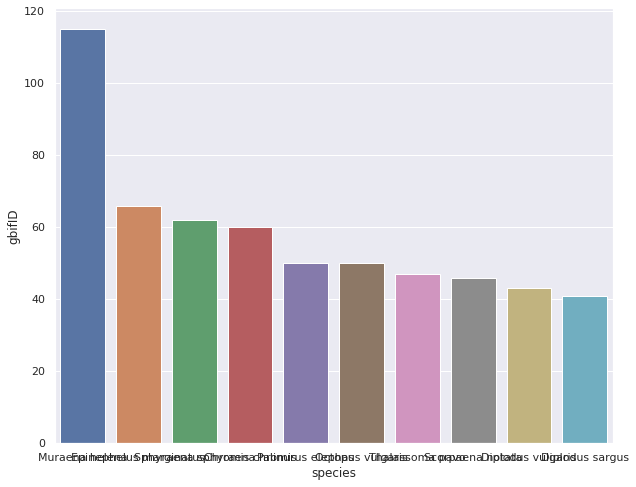

In [288]:
sns.barplot(x=df_spain.groupby('species')['gbifID'].count().sort_values(ascending=False)[:10].index,
            y=df_spain.groupby('species')['gbifID'].count().sort_values(ascending=False)[:10]);

In [229]:
map_pickup = folium.Map(location = [36.4167754, -3.7037902], zoom_start=5)

df_spain.apply(lambda row: folium.CircleMarker(location=[row['decimalLatitude'], row['decimalLongitude']]).add_to(map_pickup), axis=1)

map_pickup

In [319]:
df_spain = df_spain.copy()

In [330]:
geolocator = Nominatim(user_agent="myGeocoder")
df_spain['locator'] = df_spain.apply(lambda row: geolocator.reverse((row['decimalLatitude'], row['decimalLongitude'])),
                                     axis=1)

In [357]:
df_spain['county'] = df_spain.apply(lambda row: row['locator'].raw.get('address').get('county'),
                                   axis=1)

In [390]:
df_spain['state'] = df_spain.apply(lambda row: row['locator'].raw.get('address').get('state'),
                                   axis=1)

In [391]:
df_spain#[~df_spain['county'].isna()]

,gbifID,identifier,license,modified,references,rights,rightsHolder,type,datasetID,institutionCode,collectionCode,datasetName,ownerInstitutionCode,basisOfRecord,occurrenceID,catalogNumber,recordedBy,occurrenceStatus,occurrenceRemarks,eventDate,year,month,day,samplingProtocol,waterBody,countryCode,locality,verbatimLocality,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,georeferenceSources,identifiedBy,dateIdentified,taxonID,scientificName,nameAccordingTo,kingdom,phylum,class,order,family,genus,specificEpithet,infraspecificEpithet,taxonRank,taxonomicStatus,datasetKey,publishingCountry,lastInterpreted,elevation,elevationAccuracy,depth,depthAccuracy,issue,hasCoordinate,hasGeospatialIssues,taxonKey,acceptedTaxonKey,kingdomKey,phylumKey,classKey,orderKey,familyKey,genusKey,speciesKey,species,genericName,acceptedScientificName,verbatimScientificName,protocol,lastParsed,lastCrawled,repatriated,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,coordinates,locator,county,village,town,municipality,leisure,country,state
511,2813227463,diveboard:455428_215394_0,CC_BY_NC_4_0,2020-06-22T17:01:17Z,https://www.diveboard.com/thierry4/D6bo3fW,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,Event,https://ipt.diveboard.com/resource.do?r=divebo...,Diveboard,Diveboard,Diveboard - Scuba diving citizen science,Diveboard,HUMAN_OBSERVATION,diveboard:455428_215394_0,diveboard:455428_215394_0,Thierry,PRESENT,Non validated citizen science record,2003-07-29T10:00:00,2003,7,29,citizen science scuba dive observation,Mediterranean Sea,ES,Mariona,"Mariona, L'Hospitalet de L'Infant, Tarragona",40.9566,0.957480,100.0,Google Maps,Thierry,2003-07-29T00:00:00,http://eol.org/pages/215394,"Conger conger (Linnaeus, 1758)",EOL,Animalia,Chordata,Actinopterygii,Anguilliformes,Congridae,Conger,conger,NaN,SPECIES,ACCEPTED,66f6192f-6cc0-45fd-a2d1-e76f5ae3eab2,FR,2020-12-15T21:04:19.148Z,0.0,0.0,10.0,10.0,COORDINATE_REPROJECTION_SUSPICIOUS;INSTITUTION...,True,False,2403490,2403490.0,1,44.0,204.0,495.0,2951.0,2345836.0,2403490.0,Conger conger,Conger,"Conger conger (Linnaeus, 1758)","Conger conger (Linnaeus, 1758)",DWC_ARCHIVE,2020-12-15T21:04:19.148Z,2020-12-11T15:02:29.629Z,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<zip object at 0x7f4c1e10f280>,"(España, (39.3262345, -4.8380649))",None,None,None,None,None,España,None
525,2813227449,diveboard:455385_206618_0,CC_BY_NC_4_0,2020-06-22T17:01:17Z,https://www.diveboard.com/thierry4/D44bqDP,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,Event,https://ipt.diveboard.com/resource.do?r=divebo...,Diveboard,Diveboard,Diveboard - Scuba diving citizen science,Diveboard,HUMAN_OBSERVATION,diveboard:455385_206618_0,diveboard:455385_206618_0,Thierry,PRESENT,Non validated citizen science record,2003-07-25T10:00:00,2003,7,25,citizen science scuba dive observation,Mediterranean Sea,ES,El Poblat,"El Poblat, L'Hospitalet de L'Infant, Tarragona",40.9681,0.929383,100.0,Google Maps,Thierry,2003-07-25T00:00:00,http://eol.org/pages/206618,"Epinephelus marginatus (Lowe, 1834)",EOL,Animalia,Chordata,Actinopterygii,Perciformes,Serranidae,Epinephelus,marginatus,NaN,SPECIES,ACCEPTED,66f6192f-6cc0-45fd-a2d1-e76f5ae3eab2,FR,2020-12-15T21:04:18.294Z,0.0,0.0,9.5,9.5,COORDINATE_REPROJECTION_SUSPICIOUS;INSTITUTION...,True,False,2388507,2388507.0,1,44.0,204.0,587.0,8597.0,2335319.0,2388507.0,Epinephelus marginatus,Epinephelus,"Epinephelus marginatus (Lowe, 1834)","Epinephelus marginatus (Lowe, 1834)",DWC_ARCHIVE,2020-12-15T21:04:18.294Z,2020-12-11T15:02:29.629Z,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<zip object at 0x7f4c1e10f280>,"(España, (39.3262345, -4.8380649))",None,None,None,None,None,España,None
528,2813227446,diveboard:455429_492280_0,CC_BY_NC_4_0,2020-06-22T17:01:17Z,https://www.diveboard.com/thierry4/D6fSiLz,http://creativecommons.org/publicdomain/zero/1.0/,Diveboard,Event,https://ipt.diveboard.com/resource.do?r=divebo...,Diveboard,Diveboard,Diveboard - Scuba diving citizen science,Diveboar

In [377]:
df_spain['locator'].iloc[1551].raw.get('address')

{'leisure': 'Zona perifèrica de la Reserva Natural Parcial Marina de les Medes',
 'road': 'Camí de Ronda',
 'village': "l'Estartit",
 'town': 'Torroella de Montgrí',
 'municipality': 'Baix Empordà',
 'county': 'Girona',
 'state': 'Catalunya',
 'postcode': '17130',
 'country': 'España',
 'country_code': 'es'}